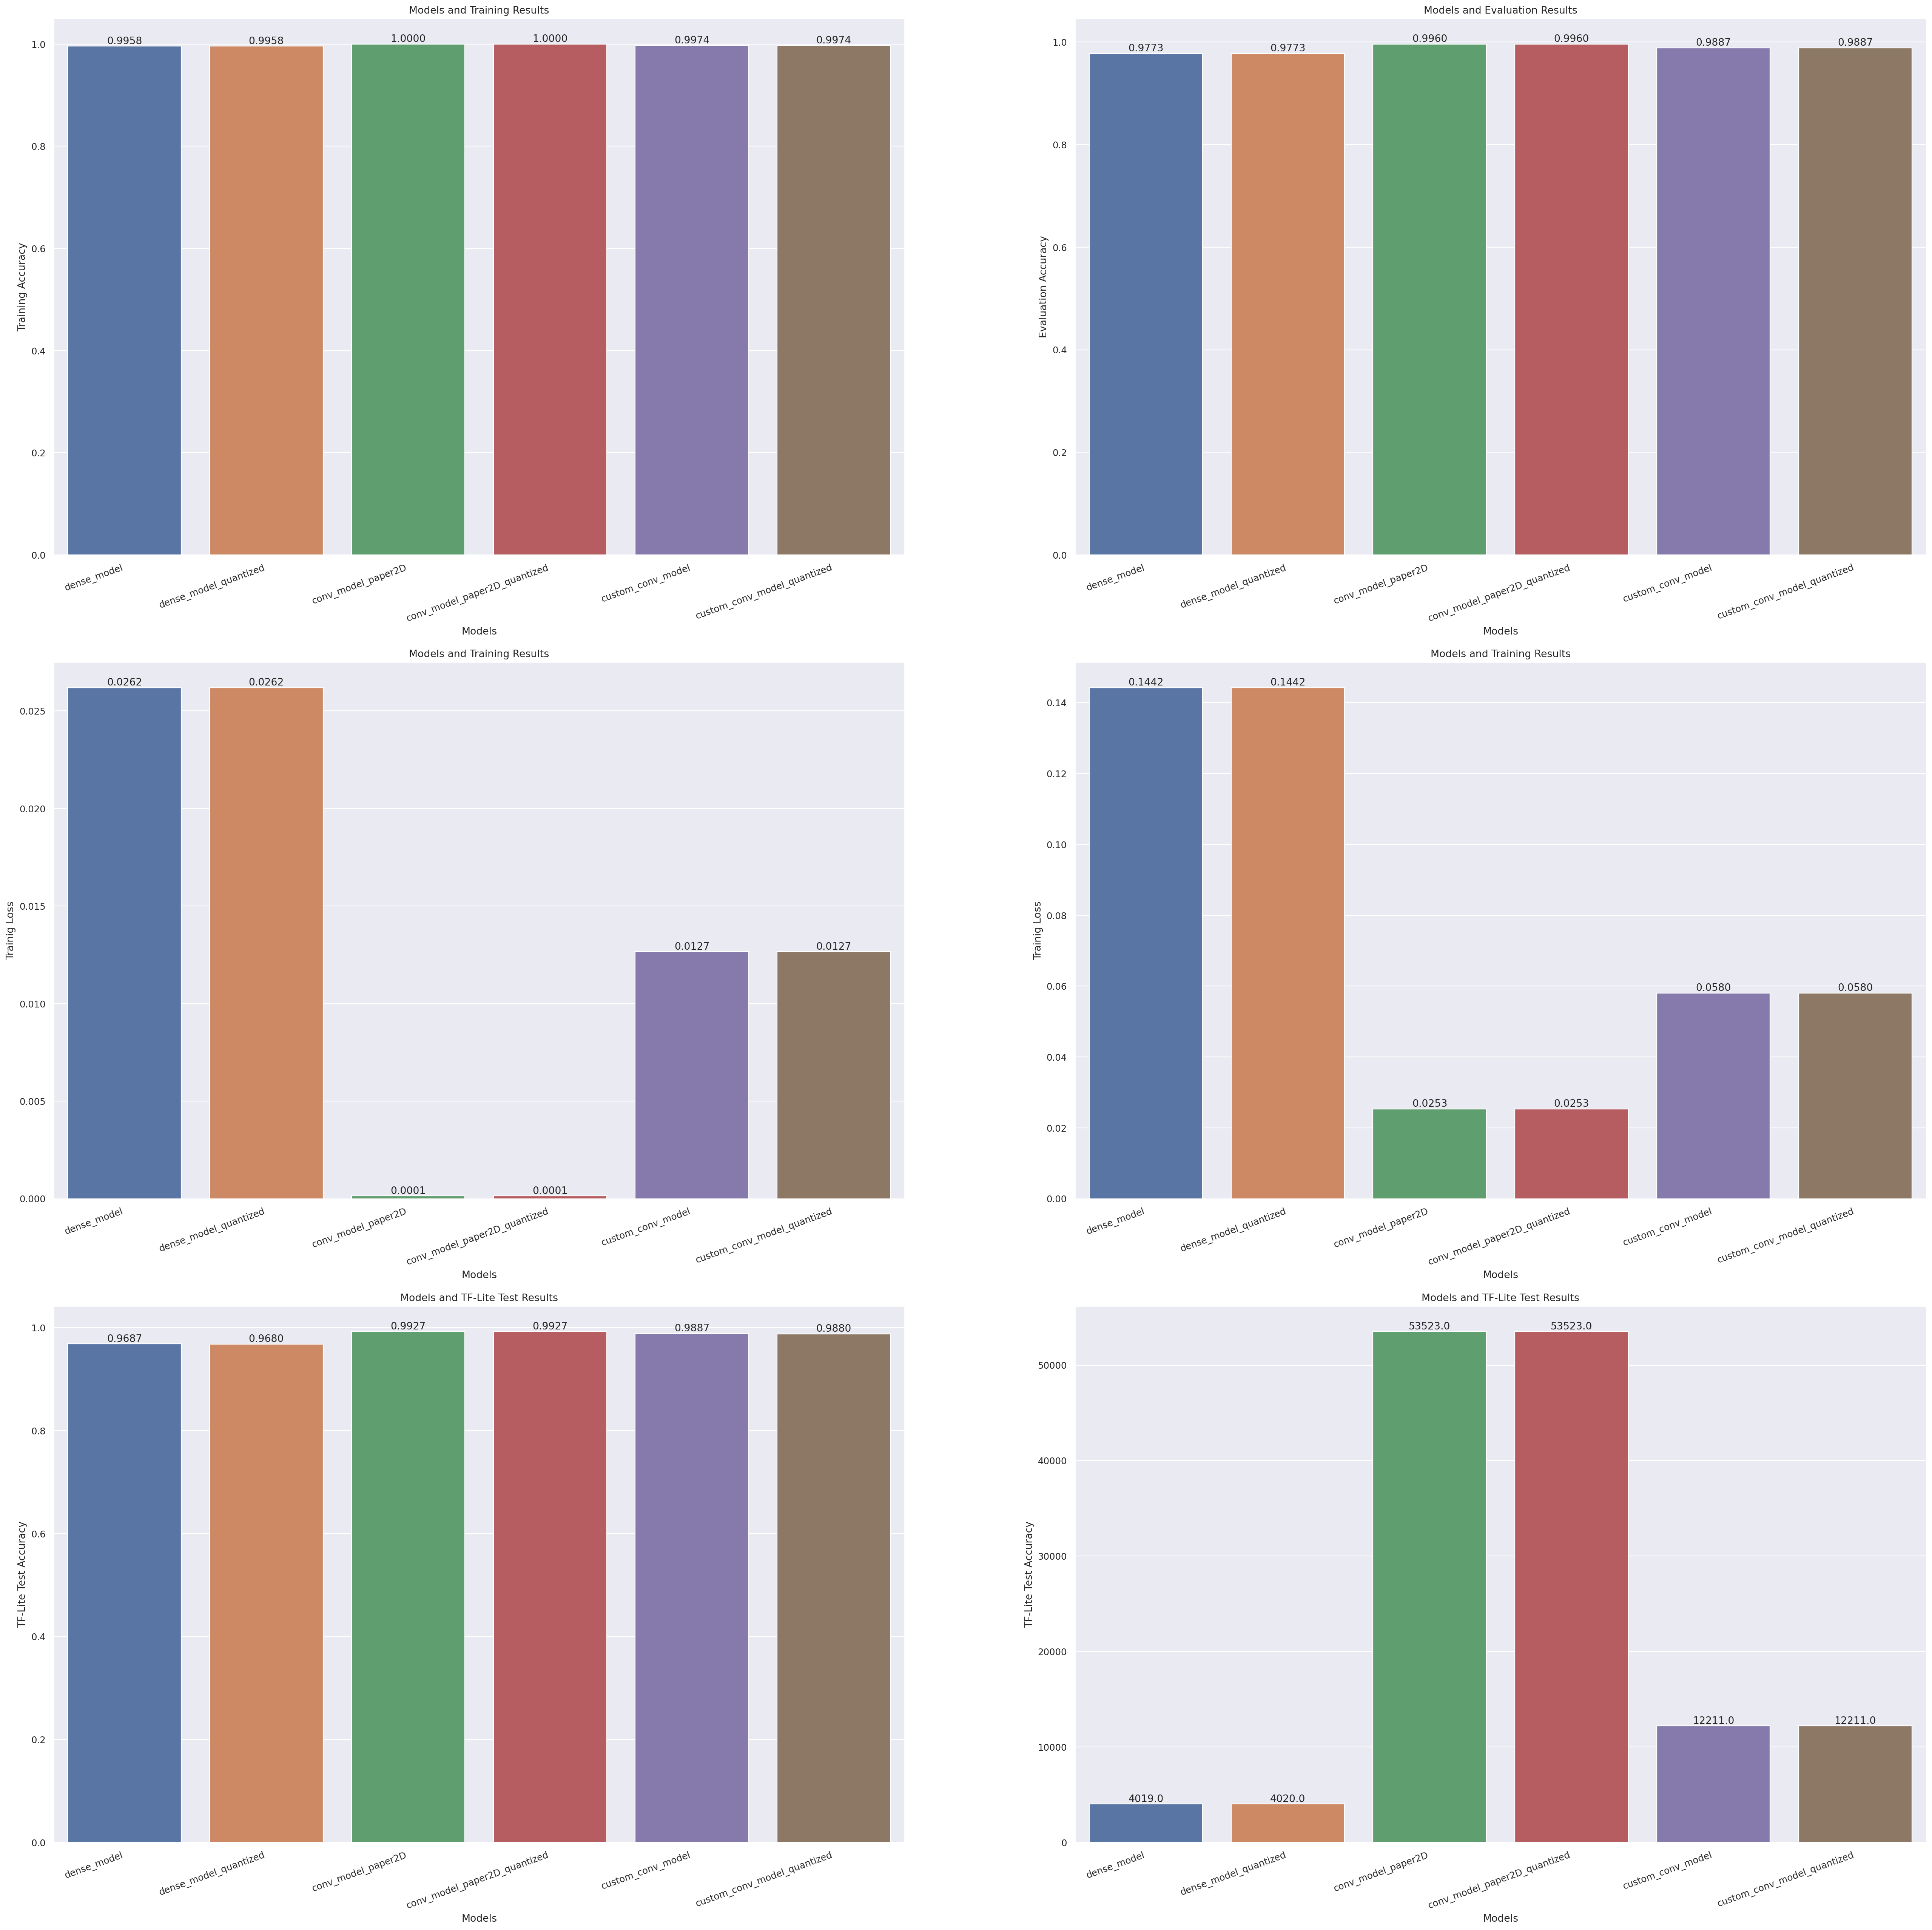

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from turtle import position

sns.set(rc={"figure.dpi":160, 'savefig.dpi':160, "figure.figsize":(40, 40)})
model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
fig, ax1 = plt.subplots(3,2)
# fig.suptitle('Model Information')
###================================================================================================
g = sns.barplot(x="model", y="training_acc",data=model_mcu_data, ax=ax1[0,0])

ax1[0,0].set_ylabel('Training Accuracy')
ax1[0,0].set_xlabel('Models')
ax1[0,0].set_title('Models and Training Results')
ax1[0,0].set_xticklabels(ax1[0,0].get_xticklabels(), rotation=20, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[0,0].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[0,0].bar_label(c, labels=labels, label_type='edge')
###================================================================================================
g = sns.barplot(x="model", y="validation_acc",data=model_mcu_data, ax=ax1[0,1])

ax1[0,1].set_ylabel('Evaluation Accuracy')
ax1[0,1].set_xlabel('Models')
ax1[0,1].set_title('Models and Evaluation Results')
ax1[0,1].set_xticklabels(ax1[0,1].get_xticklabels(), rotation=20, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[0,1].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[0,1].bar_label(c, labels=labels, label_type='edge')
###================================================================================================
g = sns.barplot(x="model", y="training_loss",data=model_mcu_data, ax=ax1[1,0])

ax1[1,0].set_ylabel('Trainig Loss')
ax1[1,0].set_xlabel('Models')
ax1[1,0].set_title('Models and Training Results')
ax1[1,0].set_xticklabels(ax1[1,0].get_xticklabels(), rotation=20, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[1,0].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[1,0].bar_label(c, labels=labels, label_type='edge')    
###================================================================================================
g = sns.barplot(x="model", y="validation_loss",data=model_mcu_data, ax=ax1[1,1])

ax1[1,1].set_ylabel('Trainig Loss')
ax1[1,1].set_xlabel('Models')
ax1[1,1].set_title('Models and Training Results')
ax1[1,1].set_xticklabels(ax1[1,1].get_xticklabels(), rotation=20, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[1,1].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[1,1].bar_label(c, labels=labels, label_type='edge')
###================================================================================================
g = sns.barplot(x="model", y="tflite_test_acc",data=model_mcu_data, ax=ax1[2,0])
ax1[2,0].set_ylabel('TF-Lite Test Accuracy')
ax1[2,0].set_xlabel('Models')
ax1[2,0].set_title('Models and TF-Lite Test Results')
ax1[2,0].set_xticklabels(ax1[1,1].get_xticklabels(), rotation=20, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[2,0].containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax1[2,0].bar_label(c, labels=labels, label_type='edge')              
###================================================================================================
g = sns.barplot(x="model", y="total_params_training",data=model_mcu_data, ax=ax1[2,1])
ax1[2,1].set_ylabel('TF-Lite Test Accuracy')
ax1[2,1].set_xlabel('Models')
ax1[2,1].set_title('Models and TF-Lite Test Results')
ax1[2,1].set_xticklabels(ax1[1,1].get_xticklabels(), rotation=20, horizontalalignment='right')

# iterate through the axes containers
for c in ax1[2,1].containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax1[2,1].bar_label(c, labels=labels, label_type='edge')  
plt.show()

Index(['mcu', 'model', 'total_params_training', 'training_acc',
       'training_loss', 'validation_acc', 'validation_loss', 'tflite_test_acc',
       'tflite_model_size_bytes', 'tensor_arena_size', 'flash_usage_bytes',
       'used_flash_percentage', 'dram_usage_bytes', 'used_dram_percentage',
       'avg_inference_time_us', 'std_inference_time_us',
       'max_inference_time_us', 'min_inference_time_us'],
      dtype='object')


(0.0, 10000.0)

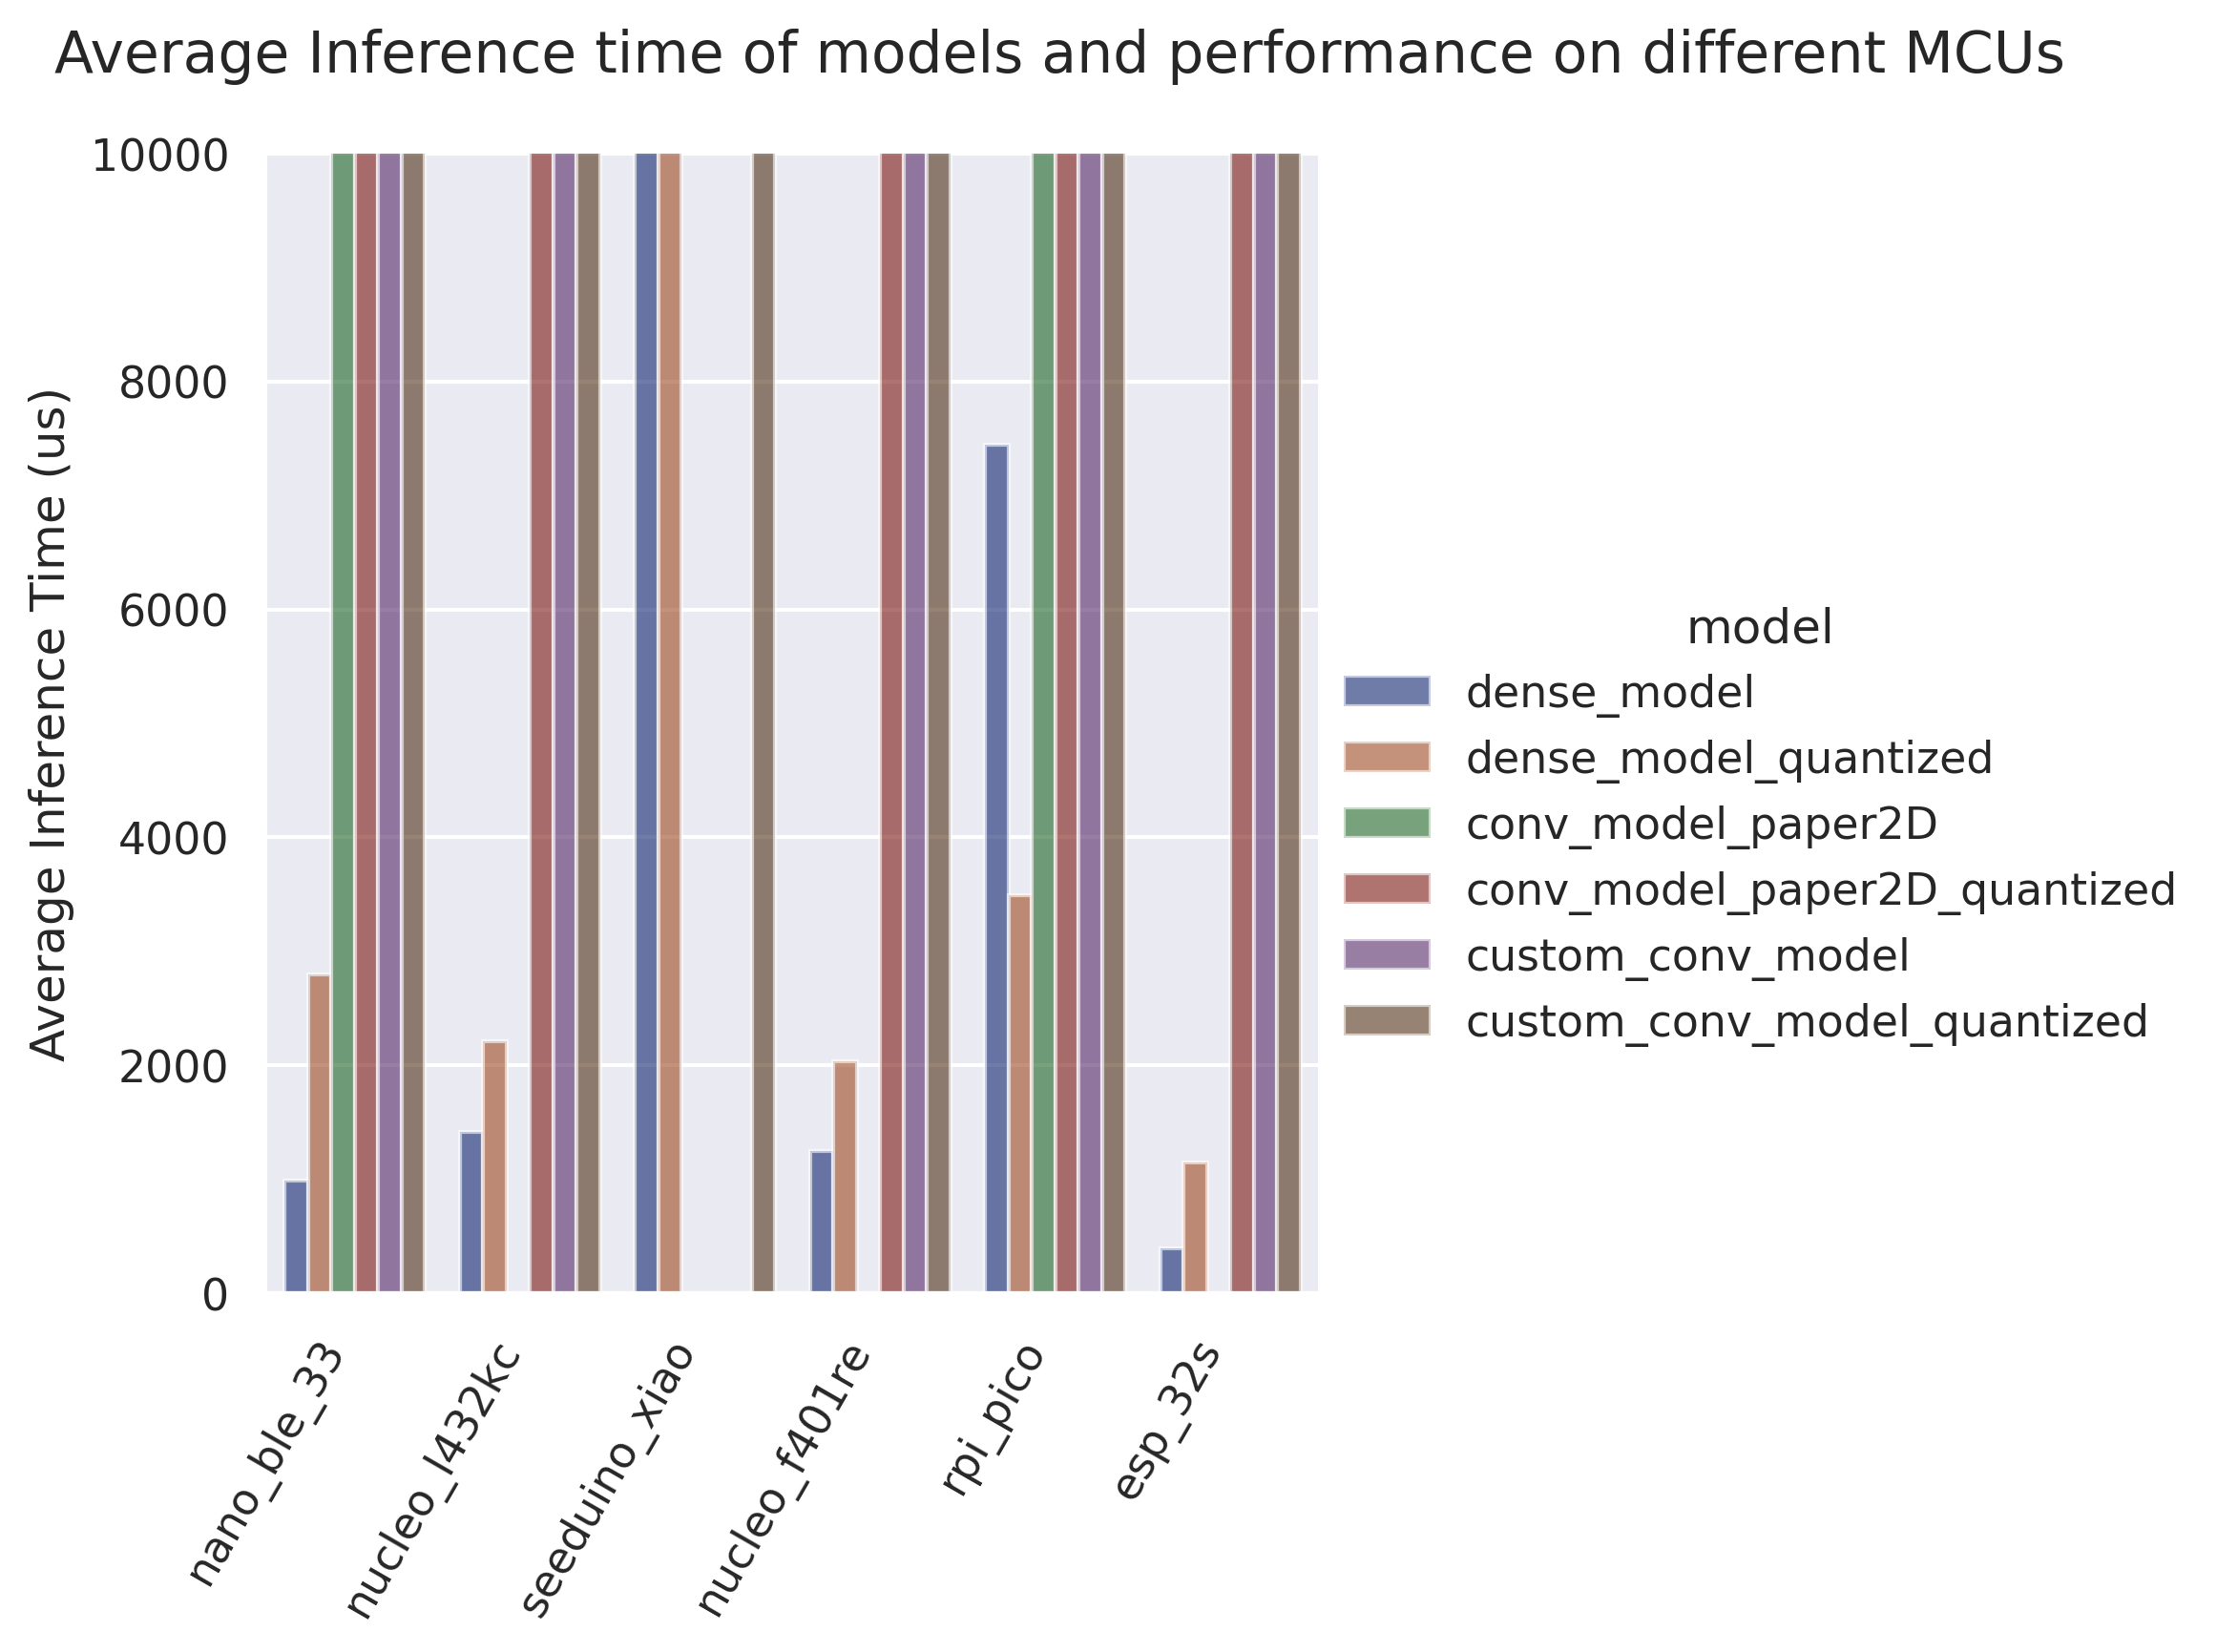

In [128]:
from turtle import position
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
print(model_mcu_data.columns)
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":300, 'savefig.dpi':160, "figure.figsize":(10, 10)})
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=model_mcu_data, kind="bar",
    x="mcu", y="avg_inference_time_us", hue="model",
    palette="dark", alpha=0.6, height=5, 
)
g.despine(left=True)
g.set_axis_labels("", "Average Inference Time (us)")
g.set_xticklabels(rotation=60, horizontalalignment='right')
g.set_titles("Models")
g.fig.suptitle("Average Inference time of models and performance on different MCUs", position=(0.5,1.02))
ax = g.facet_axis(0, 0)
ax.set_ylim(0, 1e4)

# # iterate through the axes containers
# for c in ax.containers:
#     labels = [f'{(v.get_height()):.1f}' for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')

Index(['mcu', 'model', 'total_params_training', 'training_acc',
       'training_loss', 'validation_acc', 'validation_loss', 'tflite_test_acc',
       'tflite_model_size_bytes', 'tensor_arena_size', 'flash_usage_bytes',
       'used_flash_percentage', 'dram_usage_bytes', 'used_dram_percentage',
       'avg_inference_time_us', 'std_inference_time_us',
       'max_inference_time_us', 'min_inference_time_us'],
      dtype='object')


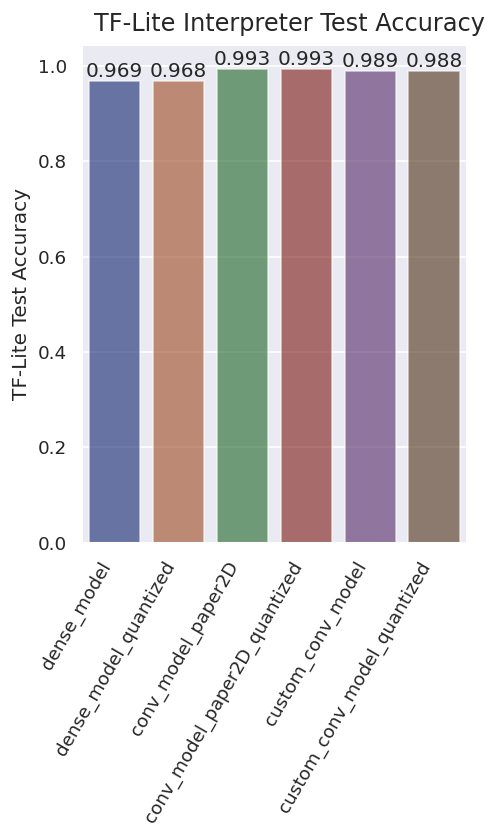

In [123]:
from turtle import position
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
print(model_mcu_data.columns)
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":120, 'savefig.dpi':120, "figure.figsize":(2, 2)})
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=model_mcu_data, kind="bar",
    x='model', y="tflite_test_acc" ,
    palette="dark", alpha=0.6, height=5, 
)
g.despine(left=True)
g.set_axis_labels("", "TF-Lite Test Accuracy")
g.set_xticklabels(rotation=60, horizontalalignment='right')
g.set_titles("Models")
g.fig.suptitle("TF-Lite Interpreter Test Accuracy", position=(0.5,1.02))
ax = g.facet_axis(0, 0)
# ax.set_ylim(0, 1e5)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',)

Index(['mcu', 'model', 'total_params_training', 'training_acc',
       'training_loss', 'validation_acc', 'validation_loss', 'tflite_test_acc',
       'tflite_model_size_bytes', 'tensor_arena_size', 'flash_usage_bytes',
       'used_flash_percentage', 'dram_usage_bytes', 'used_dram_percentage',
       'avg_inference_time_us', 'std_inference_time_us',
       'max_inference_time_us', 'min_inference_time_us'],
      dtype='object')


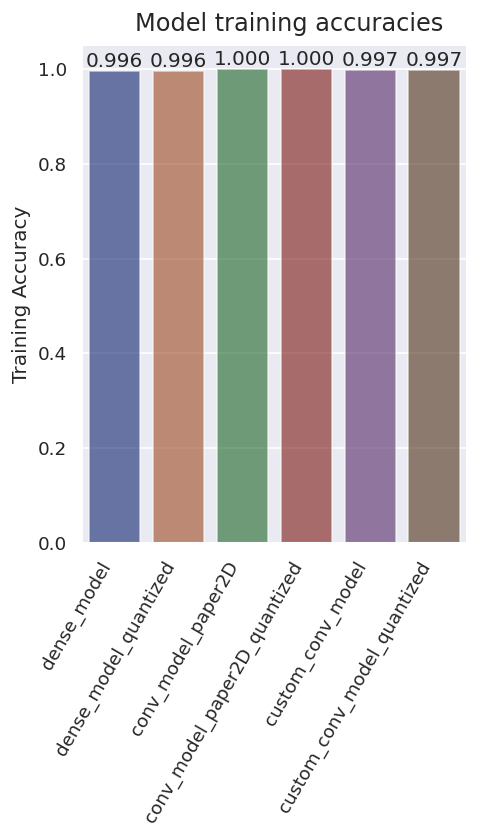

In [124]:
from turtle import position
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
print(model_mcu_data.columns)
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":120, 'savefig.dpi':120, "figure.figsize":(2, 2)})
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=model_mcu_data, kind="bar",
    x='model', y="training_acc" ,
    palette="dark", alpha=0.6, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Training Accuracy")
g.set_xticklabels(rotation=60, horizontalalignment='right')
g.set_titles("Models")
g.fig.suptitle("Model training accuracies", position=(0.5,1.02))
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Index(['mcu', 'model', 'total_params_training', 'training_acc',
       'training_loss', 'validation_acc', 'validation_loss', 'tflite_test_acc',
       'tflite_model_size_bytes', 'tensor_arena_size', 'flash_usage_bytes',
       'used_flash_percentage', 'dram_usage_bytes', 'used_dram_percentage',
       'avg_inference_time_us', 'std_inference_time_us',
       'max_inference_time_us', 'min_inference_time_us'],
      dtype='object')


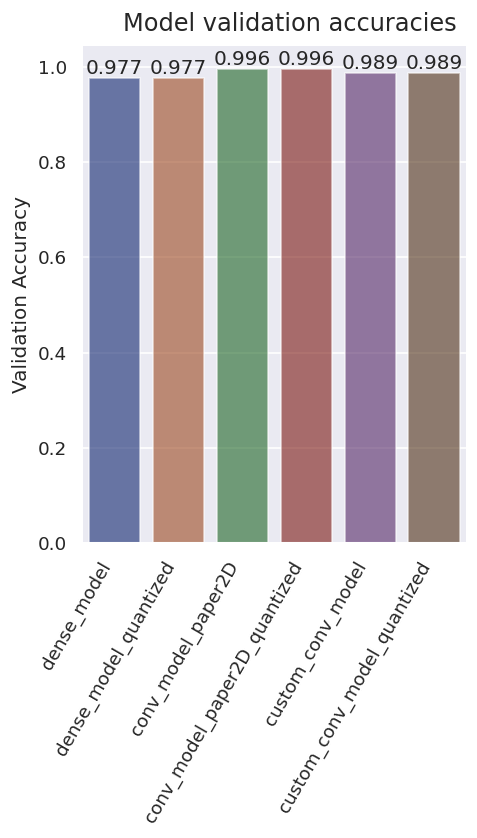

In [125]:
from turtle import position
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
print(model_mcu_data.columns)
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":120, 'savefig.dpi':120, "figure.figsize":(2, 2)})
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=model_mcu_data, kind="bar",
    x='model', y="validation_acc" ,
    palette="dark", alpha=0.6, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Validation Accuracy")
g.set_xticklabels(rotation=60, horizontalalignment='right')
g.set_titles("Models")
g.fig.suptitle("Model validation accuracies", position=(0.5,1.02))
ax = g.facet_axis(0, 0)
# ax.set_ylim(0, 1e5)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',)

Index(['mcu', 'model', 'total_params_training', 'training_acc',
       'training_loss', 'validation_acc', 'validation_loss', 'tflite_test_acc',
       'tflite_model_size_bytes', 'tensor_arena_size', 'flash_usage_bytes',
       'used_flash_percentage', 'dram_usage_bytes', 'used_dram_percentage',
       'avg_inference_time_us', 'std_inference_time_us',
       'max_inference_time_us', 'min_inference_time_us'],
      dtype='object')


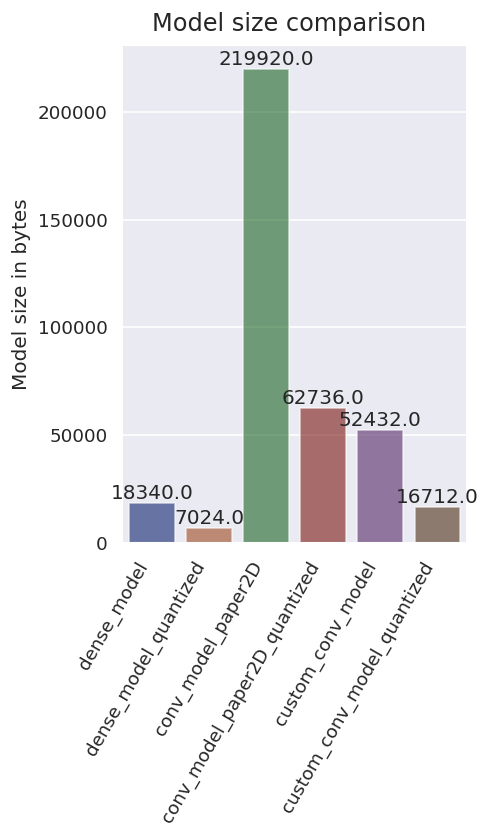

In [131]:
from turtle import position
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
print(model_mcu_data.columns)
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":120, 'savefig.dpi':120, "figure.figsize":(2, 2)})
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=model_mcu_data, kind="bar",
    x='model', y="tflite_model_size_bytes" ,
    palette="dark", alpha=0.6, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Model size in bytes")
g.set_xticklabels(rotation=60, horizontalalignment='right')
g.set_titles("Models")
g.fig.suptitle("Model size comparison", position=(0.5,1.02))
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [ ]:
from turtle import position
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

model_mcu_data = pd.read_csv("mcu-data-to-plot.csv",header=[0])
print(model_mcu_data.columns)
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":120, 'savefig.dpi':120, "figure.figsize":(2, 2)})
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=model_mcu_data, kind="bar",
    x='model', y="tflite_model_size_bytes" ,
    palette="dark", alpha=0.6, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Model size in bytes")
g.set_xticklabels(rotation=60, horizontalalignment='right')
g.set_titles("Models")
g.fig.suptitle("Model size comparison", position=(0.5,1.02))
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')